In [2]:
import librosa
from librosa import feature
import numpy as np
fn_list_i = [
 feature.chroma_stft,
 feature.spectral_centroid,
 feature.spectral_bandwidth,
 feature.spectral_rolloff
]
 
fn_list_ii = [
 feature.rms,
 feature.zero_crossing_rate
]
def get_feature_vector(y,sr): 
   feat_vect_i = [ np.mean(funct(y,sr)) for funct in fn_list_i]
   feat_vect_ii = [ np.mean(funct(y)) for funct in fn_list_ii] 
   feature_vector = feat_vect_i + feat_vect_ii 
   return feature_vector

In [7]:
from glob import glob
#directories of normal audios
norm_data_dir = "assets/data/audio_data/6_dB_pump/pump/**/*.wav"
norm_audio_files = glob(norm_data_dir, recursive=True)

In [8]:
norm_audio_files

['assets/data/audio_data/6_dB_pump/pump/id_04/abnormal/00000078.wav',
 'assets/data/audio_data/6_dB_pump/pump/id_04/abnormal/00000090.wav',
 'assets/data/audio_data/6_dB_pump/pump/id_04/abnormal/00000030.wav',
 'assets/data/audio_data/6_dB_pump/pump/id_04/abnormal/00000087.wav',
 'assets/data/audio_data/6_dB_pump/pump/id_04/abnormal/00000081.wav',
 'assets/data/audio_data/6_dB_pump/pump/id_04/abnormal/00000068.wav',
 'assets/data/audio_data/6_dB_pump/pump/id_04/abnormal/00000033.wav',
 'assets/data/audio_data/6_dB_pump/pump/id_04/abnormal/00000098.wav',
 'assets/data/audio_data/6_dB_pump/pump/id_04/abnormal/00000080.wav',
 'assets/data/audio_data/6_dB_pump/pump/id_04/abnormal/00000037.wav',
 'assets/data/audio_data/6_dB_pump/pump/id_04/abnormal/00000043.wav',
 'assets/data/audio_data/6_dB_pump/pump/id_04/abnormal/00000093.wav',
 'assets/data/audio_data/6_dB_pump/pump/id_04/abnormal/00000091.wav',
 'assets/data/audio_data/6_dB_pump/pump/id_04/abnormal/00000089.wav',
 'assets/data/audio_

In [9]:
norm_audios_feat = []
for file in norm_audio_files:
   y , sr = librosa.load(file,sr=None)
   feature_vector = get_feature_vector(y, sr)
   norm_audios_feat.append(feature_vector) 

In [14]:
type(norm_audios_feat)

list

In [16]:
import pandas as pd

data_matrics= pd.DataFrame(norm_audios_feat)

In [17]:
data_matrics_normalized=(data_matrics-data_matrics.mean())/data_matrics.std()

In [23]:
from sklearn.cluster import KMeans
import seaborn as sns

In [20]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(data_matrics_normalized)
cluster_labels = pd.Series(kmeans.labels_, name='cluster')

In [21]:
cluster_labels.value_counts()

0    3075
1    1130
Name: cluster, dtype: int64

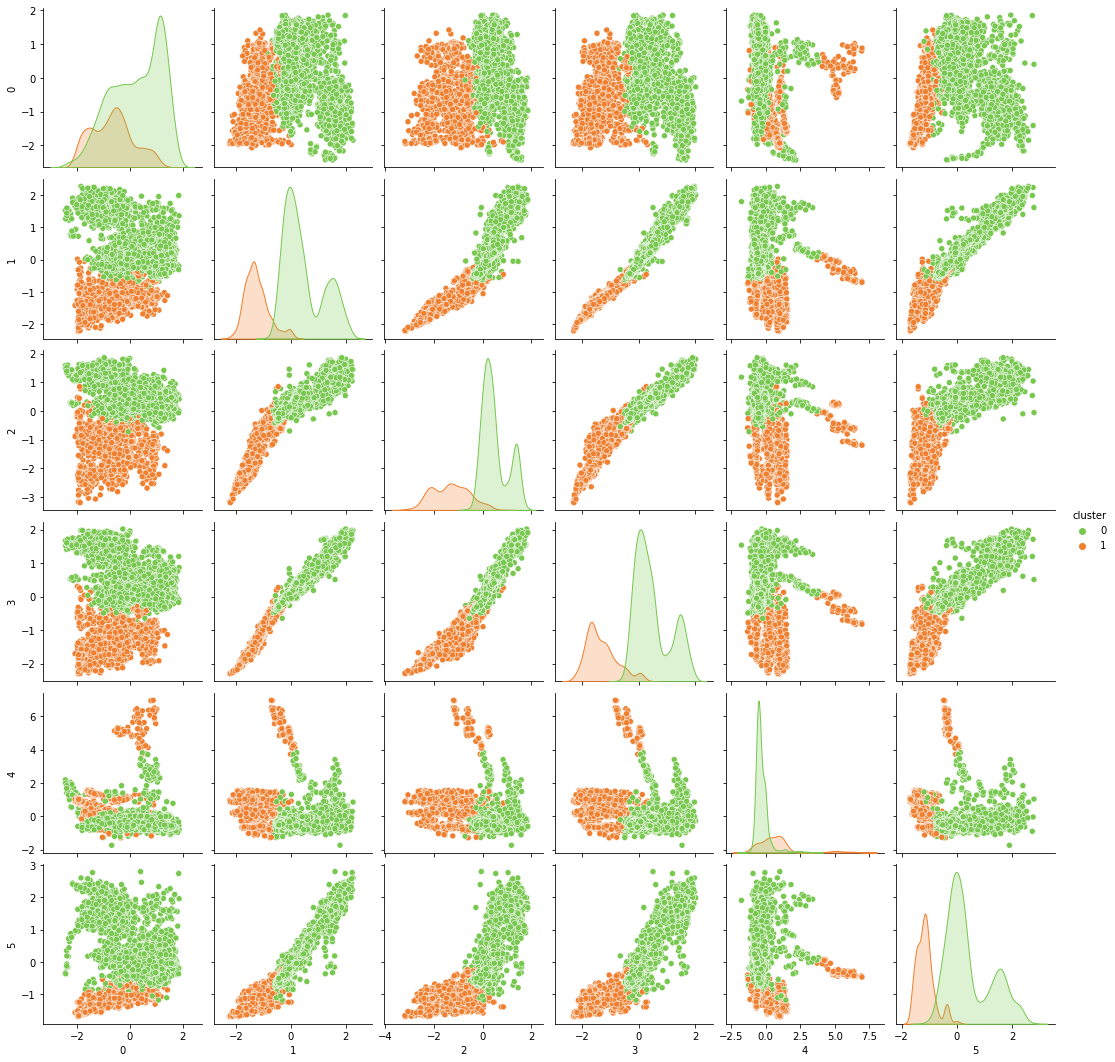

In [24]:
data_matrics_kmean = data_matrics_normalized.join(cluster_labels.to_frame())
sns.pairplot(data_matrics_kmean, hue = 'cluster', palette=['#78C850', '#F08030'])

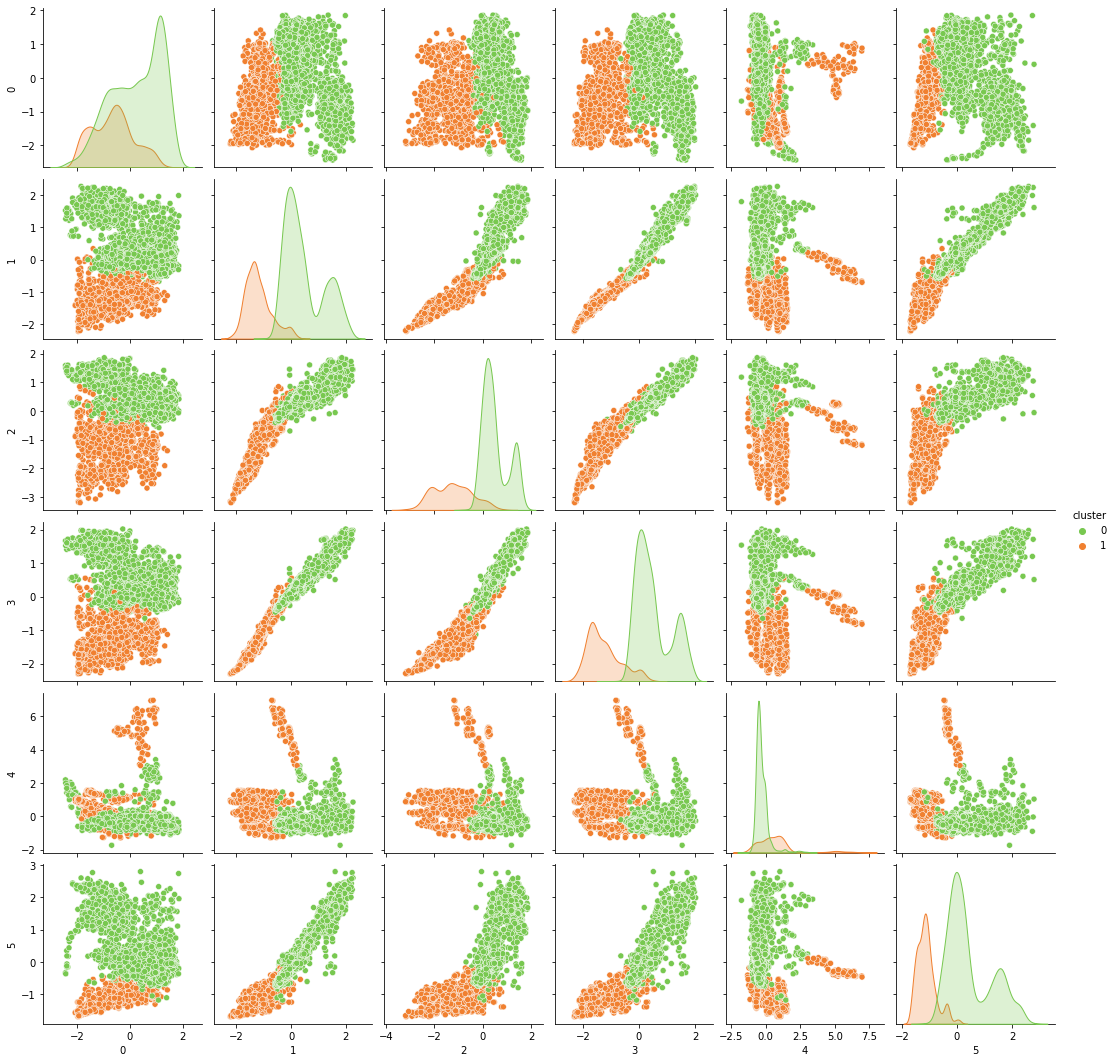

In [25]:
from sklearn.cluster import AgglomerativeClustering

AggCluster= AgglomerativeClustering(n_clusters=2)
AggCluster.fit(data_matrics_normalized)
cluster_labels = pd.Series(AggCluster.labels_, name='cluster')
data_metrics_AggCluster = data_matrics_normalized.join(cluster_labels.to_frame())
sns.pairplot(data_metrics_AggCluster, hue = 'cluster', palette=['#78C850', '#F08030'])

In [26]:
cluster_labels.value_counts()

0    3022
1    1183
Name: cluster, dtype: int64